In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import xml.etree.ElementTree as ET
import random
import os

In [2]:
path_to_img = './images_subset/'

In [3]:
filelist= [file for file in os.listdir(path_to_img) if file.endswith('.png')]
filename = [name[:-4] for name in filelist]

In [14]:
#randomly select images
randomfiles = random.sample(filename, 10)

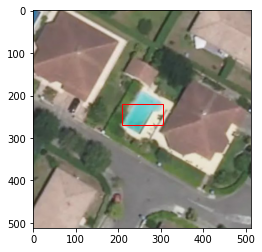

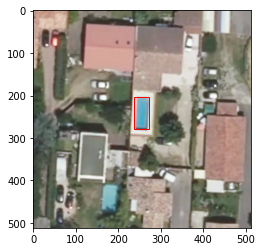

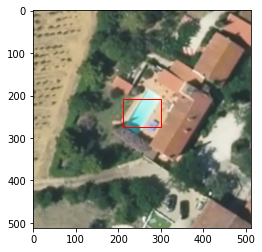

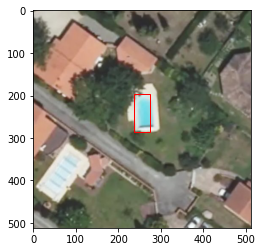

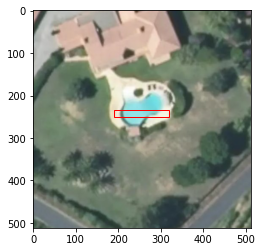

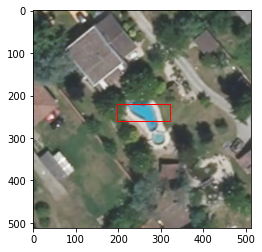

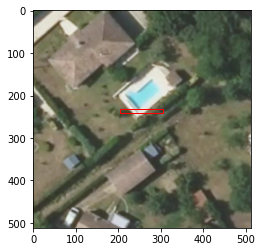

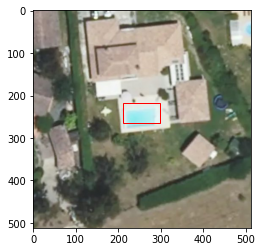

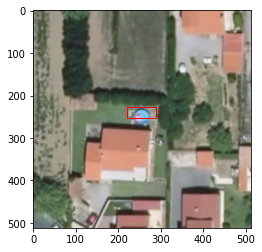

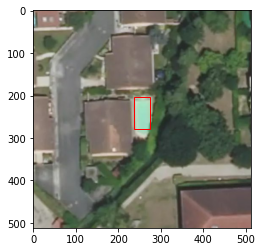

In [17]:
for idx, file in enumerate(randomfiles):
    im = Image.open(path_to_img + file + '.png')
    tree = ET.parse(path_to_img + file + '.xml')
    root = tree.getroot()
    xmin = int(root.find("object").find("bndbox").find("xmin").text)
    ymin = int(root.find("object").find("bndbox").find("ymin").text)
    xmax = int(root.find("object").find("bndbox").find("xmax").text)
    ymax = int(root.find("object").find("bndbox").find("ymax").text)
    width = xmax - xmin
    height = ymax - ymin
    
    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(im)

    # Create a Rectangle patch
    # rect = patches.Rectangle((50, 100), 40, 30, linewidth=1, edgecolor='r', facecolor='none')
    rect = patches.Rectangle((xmin,ymax), width, -height, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    plt.show()